In [1]:
import math
import random
#Benötigte Pakete

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Circle 
import seaborn as sns
from scipy import stats
from decimal import Decimal

import matplotlib.mlab as mlab
import numpy as np
import cmath

from numpy import linalg as LA
import scipy
from scipy import spatial
import time
#import tables

import os
#import h5py

from matplotlib import animation
import matplotlib
from scipy.optimize import curve_fit
from matplotlib import rc

import gc
import sys
gc.enable()
import copy

from mpl_toolkits import mplot3d

from scipy.odr import *

def poly_func_scipy(N,*a):
    return a[0]*N**(-a[1])

def poly_func(a,N):
    return a[0]*N**(-a[1])

### Plots for the eigenstates 

plot_one_eigenstate shows characteristics of a special eigenstate.
plot_all_eigenstates shows properties of the whole system, like Participation ratios oder level statistics.

In [19]:
def plot_one_eigenstate(p_eigenstate, density_eig, schwerpunkt, dr_corr):
    
    # 3d and 2d scatter animation plot ------------------------------------------------------------------
    
    fig = plt.figure(figsize=(15,12))
    ax = fig.add_subplot(2, 2, 1)
    ax.set_aspect('equal')
    
    scat= ax.scatter(atoms_array[:,0], atoms_array[:,1], marker='o', c=p_eigenstate, cmap = "jet",
                      norm=matplotlib.colors.LogNorm(vmin=1*10**-4,vmax=1*10**0))
    
    plt.colorbar(scat, label="probability", ax=ax)
    ax.plot(schwerpunkt[0],schwerpunkt[1],"x",markersize=15,markeredgewidth=2, markerfacecolor="red",markeredgecolor="red")
    
    
    ax = fig.add_subplot(2, 2, 2, projection='3d')
    ax.plot_trisurf(atoms_array[:,0], atoms_array[:,1], p_eigenstate, cmap='jet', linewidth=0.5,
                    norm=matplotlib.colors.LogNorm(vmin=1*10**-4,vmax=1))
   

    ax = fig.add_subplot(2, 2, 3)
    ax.set_aspect('equal')
    
    indices= np.squeeze(scipy.spatial.distance.cdist([schwerpunkt],atoms_array, metric='euclidean')<radius*0.3)
    atoms_close= atoms_array[indices]
    scat2= ax.scatter(atoms_close[:,0], atoms_close[:,1], marker='o',c=p_eigenstate[indices], cmap = "jet",
                      norm=matplotlib.colors.LogNorm(vmin=1*10**-4,vmax=1*10**0))
   
    for i in range(len(atoms_close)):
        circle = plt.Circle((atoms_close[i][0], atoms_close[i][1]), radius=r_b, fill=False)
        plt.gca().add_patch(circle)
  
    

    plt.show()

    #----------------------------------------------------------------------------------------------------

    
    fig, axes = plt.subplots(2,2,figsize=(13,8))  # 2 rows, 2 columns
    plt.tight_layout()  
    plt.subplots_adjust(wspace=0.2, hspace=0.3)
     
    
    axes[1,0].set_title("radial density - single log")
    axes[1,0].plot(x1,density_eig)
    axes[1,0].set_yscale("log")
    
    axes[1,1].set_title("radial density - double log")
    axes[1,1].plot(x1,density_eig)
    axes[1,1].set_xscale("log")
    axes[1,1].set_yscale("log")
    
    axes[1,1].plot(x,poly_func(x,10000,-6)) 
    

def plot_all_eigenstates(ipr,ratio,plot):
    
    x=np.arange(0,radius,1)   
    
    fig, axes = plt.subplots(4,2,figsize=(13,15))  # 2 rows, 2 columns
    plt.tight_layout()  
    plt.subplots_adjust(wspace=0.2)
    

   
    axes[0,0].set_title("Level Spectrum")
    bins = np.linspace(min(eigenvalues[plot]),max(eigenvalues[plot]),50)
    axes[0,0].hist(eigenvalues[plot],bins=bins)
    axes[0,0].ticklabel_format(axis="x", style="scientific",scilimits=(0,0),useMathText=True)
    axes[0,0].set_xlabel("energy")
    axes[0,0].set_ylabel("#")
    
    states=np.arange(0,anzahl[plot],1)
    axes[0,1].set_title("Inverse Participation Ratio - über Energie")
    axes[0,1].errorbar(eigenvalues[plot],ipr[plot], linestyle="None", marker=".") ;   
    #axes[1,0].set_yscale("log")
    axes[0,1].set_xlabel("energy")
    axes[0,1].set_ylabel("Inverse PR")
    axes[0,1].ticklabel_format(axis="x", style="scientific",scilimits=(0,0),useMathText=True)
          
        
        
        
    states=np.arange(0,anzahl[plot],1)
    axes[1,0].set_title("Participation Ratio - über Energie")
    axes[1,0].errorbar(eigenvalues[plot],1/ipr[plot], linestyle="None", marker=".") ;   
    #axes[0,0].set_yscale("log")
    axes[1,0].set_xlabel("energy")
    axes[1,0].set_ylabel("PR")
    axes[1,0].ticklabel_format(axis="x", style="scientific",scilimits=(0,0),useMathText=True)   
        
        
        
    bin_means, bin_edges, binnumber = stats.binned_statistic(eigenvalues[plot],
                    ipr[plot], statistic='mean', bins=50)
    bin_std, bin_edges, binnumber = stats.binned_statistic(eigenvalues[plot],
                    ipr[plot], statistic='std', bins=50)
    

def plot_all_eigenstates(ipr,ratio,eigenvalues,plot):
    
    
    fig, axes = plt.subplots(1,figsize=(4,4))  # 2 rows, 2 columns
    plt.tight_layout()  
    plt.subplots_adjust(wspace=0.2)
    
    axes.set_title("Level Spectrum")
    bins = np.linspace(min(eigenvalues[plot]),max(eigenvalues[plot]),50)
    axes.hist(eigenvalues[plot],bins=bins)
    axes.ticklabel_format(axis="x", style="scientific",scilimits=(0,0),useMathText=True)
    axes.set_xlabel("energy")
    axes.set_ylabel("#")
    
    
    
    x=np.arange(0,radius,1)   
    
    fig, axes = plt.subplots(4,2,figsize=(13,15))  # 2 rows, 2 columns
    plt.tight_layout()  
    plt.subplots_adjust(wspace=0.2)
    
    
    states=np.arange(0,anzahl[plot],1)
    axes[0,0].set_title("Inverse Participation Ratio - über Energie")
    axes[0,0].errorbar(eigenvalues[plot],ipr[plot], linestyle="None", marker=".") ;   
    #axes[1,0].set_yscale("log")
    axes[0,0].set_xlabel("energy")
    axes[0,0].set_ylabel("Inverse PR")
    axes[0,0].ticklabel_format(axis="x", style="scientific",scilimits=(0,0),useMathText=True)
          
        
        
    bin_means, bin_edges, binnumber = stats.binned_statistic(eigenvalues[plot],
                    ipr[plot], statistic='mean', bins=50)
    bin_std, bin_edges, binnumber = stats.binned_statistic(eigenvalues[plot],
                    ipr[plot], statistic='std', bins=50)
    
    
    axes[0,1].fill_between(bin_edges[1:], bin_means-bin_std, bin_means+bin_std, color="darkseagreen", alpha=0.2)
    axes[0,1].hlines(bin_means, bin_edges[:-1], bin_edges[1:], colors='g', lw=3,
               label='binned statistic of data')
    axes[0,1].set_title("Inverse Participation ratio - gebint")
    axes[0,1].ticklabel_format(axis="x", style="scientific",scilimits=(0,0),useMathText=True)
    axes[0,1].set_xlabel("energy")
    axes[0,1].set_ylabel("Inverse PR")
    
        
        
    states=np.arange(0,anzahl[plot],1)
    axes[1,0].set_title("Participation Ratio - über Energie")
    axes[1,0].errorbar(eigenvalues[plot],1/ipr[plot], linestyle="None", marker=".") ;   
    #axes[0,0].set_yscale("log")
    axes[1,0].set_xlabel("energy")
    axes[1,0].set_ylabel("PR")
    axes[1,0].ticklabel_format(axis="x", style="scientific",scilimits=(0,0),useMathText=True)   
        
        
    bin_means, bin_edges, binnumber = stats.binned_statistic(eigenvalues[plot],
                    1/ipr[plot], statistic='mean', bins=50)
    bin_std, bin_edges, binnumber = stats.binned_statistic(eigenvalues[plot],
                    1/ipr[plot], statistic='std', bins=50)
    
    
    axes[1,1].fill_between(bin_edges[1:], bin_means-bin_std, bin_means+bin_std, color="darkseagreen", alpha=0.2)
    axes[1,1].hlines(bin_means, bin_edges[:-1], bin_edges[1:], colors='g', lw=3,
               label='binned statistic of data')
    axes[1,1].set_title("Participation ratio - gebint")
    axes[1,1].ticklabel_format(axis="x", style="scientific",scilimits=(0,0),useMathText=True)
    axes[1,1].set_xlabel("energy")
    axes[1,1].set_ylabel("PR")
    
    

    axes[2,0].set_title("Level Spectrum")
    axes[2,0].hist(1/ipr[plot],bins=50)
    axes[2,0].set_xlabel("PR")
    axes[2,0].set_ylabel("#")
    

    axes[2,1].set_title("Level Spectrum")
    axes[2,1].hist(ipr[plot],bins=500)
    axes[2,1].ticklabel_format(axis="x", style="scientific",scilimits=(0,0),useMathText=True)
    axes[2,1].set_xlabel("Inverse PR")
    axes[2,1].set_ylabel("#")
    
    hist, bin_edges = np.histogram(ratio[plot], bins=500)
    axes[3,0].step(bin_edges[:-1],hist,where="post");
    axes[3,0].set_title("Häufigkeit der level spacing ratios")
    
    
    bin_means, bin_edges, binnumber = stats.binned_statistic(eigenvalues[plot],
                    ratio[plot], statistic='mean', bins=50)
    bin_std, bin_edges, binnumber = stats.binned_statistic(eigenvalues[plot],
                    ratio[plot], statistic='std', bins=50)

    
    axes[3,1].fill_between(bin_edges[1:], bin_means-bin_std, bin_means+bin_std, color="darkseagreen", alpha=0.2)
    axes[3,1].hlines(bin_means, bin_edges[:-1], bin_edges[1:], colors='g', lw=3,
               label='binned statistic of data') 
    axes[3,1].set_title("averaged level spacing ratios")
    
    fig.tight_layout()

In [3]:
global number_atoms
global radius

number_atoms=100
density= 0.54
r_b = 5
radius = (np.sqrt(number_atoms*r_b**2/density))

global angeregt
angeregt=0                  #atom 0 is atom in the center

anzahl = np.array([100,500,1000,1500,2000,2500,5000,7500,10000,12500])
radiusse = (np.sqrt(anzahl*r_b**2/density))


In [4]:
print("anzahl", anzahl)
print("radius", np.round(radiusse,2))
print("dichte", anzahl*r_b**2/radiusse**2)

anzahl [  100   500  1000  1500  2000  2500  5000  7500 10000 12500]
radius [ 68.04 152.15 215.17 263.52 304.29 340.21 481.13 589.26 680.41 760.73]
dichte [0.54 0.54 0.54 0.54 0.54 0.54 0.54 0.54 0.54 0.54]


#### ohne q values

Die Daten werden im Folgenden aus den Datein eingelesen.

In [5]:
eigenvalues=[[] for i in range(len(anzahl))]
ipr=[[] for i in range(len(anzahl))]
ratios=[[] for i in range(len(anzahl))]

i=0
for number_atoms, radius in zip(anzahl,radiusse):  
    density=number_atoms*r_b**2/radius**2
    data = open("/home/jp/Dokumente/Bachelorarbeit/Mein_paper/BwHpcCluster/Results/Fractality/q_2/density_"+str(np.round(density,3))+"/atoms_"+str(number_atoms)+".npy","rb")
    
    ipr[i]=np.load(data)
    ratios[i]=np.load(data)
    eigenvalues[i]=np.load(data)
    i+=1
    
ipr=np.array(ipr)
ratios=np.array(ratios)
eigenvalues=np.array(eigenvalues)

Für jede Systemgröße wird der IPR über der Energie gebinnt.
Für das Binning werden aber für jede Systemgröße die gleichen Bins benutzt, weil sich das Spektrum nicht ändern sollte.

In [6]:
ipr_gebint =[[] for i in anzahl]
ipr_std    =[[] for i in anzahl]

eig_min= max(min(x) for x in eigenvalues)
eig_max= min(max(x) for x in eigenvalues)

steps=100
bins=np.linspace(eig_min,eig_max,steps)

for i in range(len(anzahl)):
    bin_means, bin_edges, binnumber = stats.binned_statistic(eigenvalues[i],ipr[i], statistic='mean', bins=bins)
    bin_std, bin_edges, binnumber  = stats.binned_statistic(eigenvalues[i],ipr[i], statistic='std', bins=bins)
    
    ipr_gebint[i] = bin_means
    ipr_std[i]    = bin_std 
    
ipr_gebint=np.array(ipr_gebint)
ipr_std=np.array(ipr_std)

## Auswertung

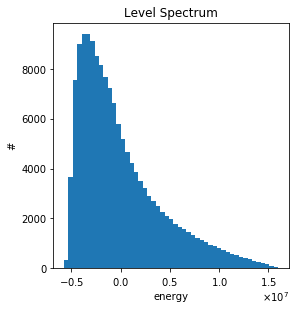

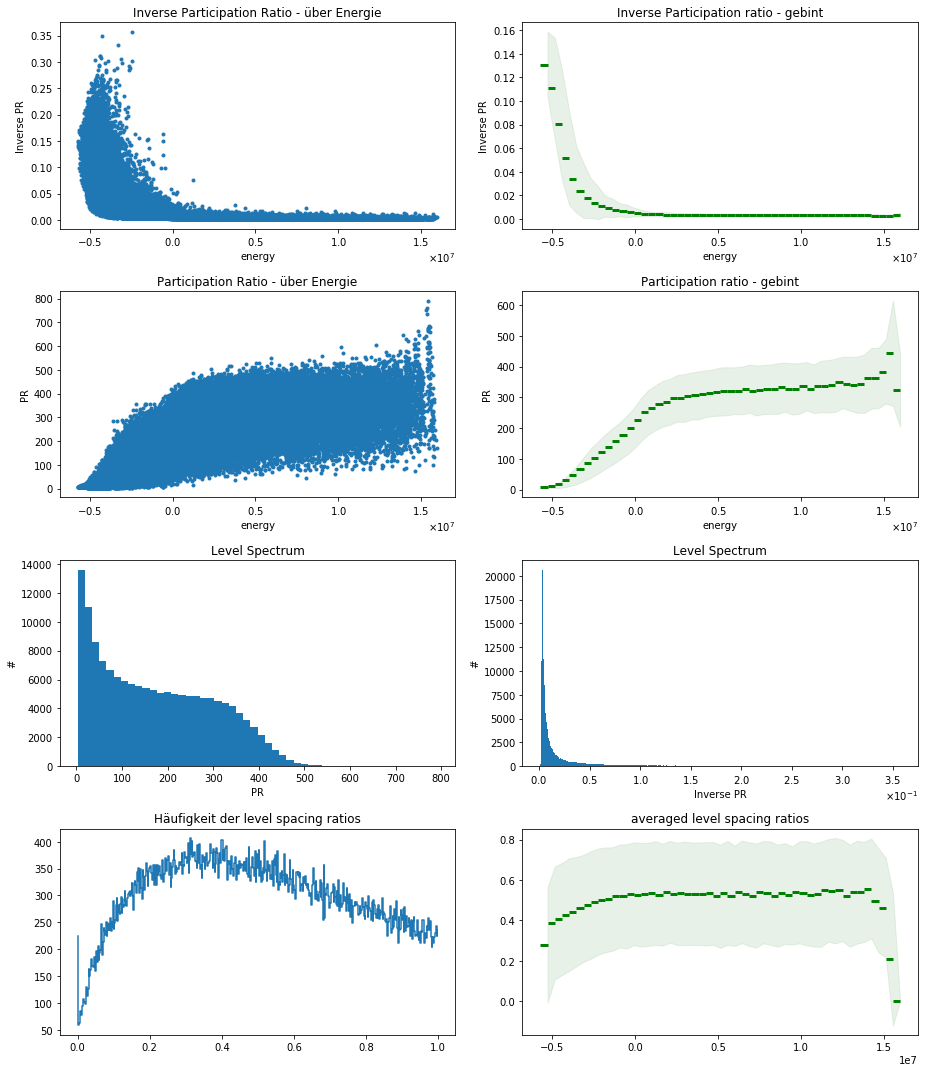

In [9]:
plot_all_eigenstates(ipr,ratios,eigenvalues,3)

#### Die Number_atoms Abhängikeit für eine bestimmte Energie

In [8]:
smallest_eig = np.zeros(len(anzahl))
biggest_eig  = np.zeros(len(anzahl))
zero_eig     = np.zeros(len(anzahl))
same_smallest_eig     = np.zeros(len(anzahl))
same_biggest_eig      = np.zeros(len(anzahl))

for i in range(len(anzahl)):
    smallest_eig[i] = ipr[i][np.argmin(eigenvalues[i])]
    biggest_eig[i]  = ipr[i][np.argmax(eigenvalues[i])]
    zero_eig[i]     = ipr[i][np.argmin(np.abs(eigenvalues[i]))]
    
    
    same_smallest_eig[i] = ipr[i][np.argmin(np.abs(eigenvalues[i]-eig_min))]
    same_biggest_eig[i]  = ipr[i][np.argmin(np.abs(eigenvalues[i]-eig_max))]

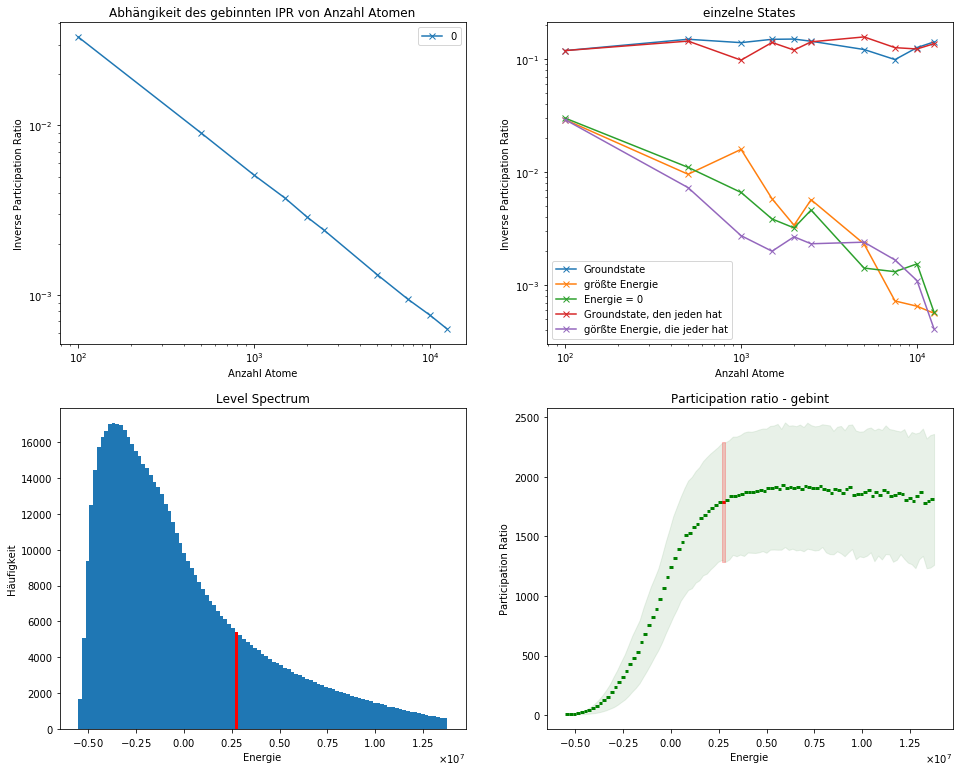

In [9]:
plot=42

fig, axes = plt.subplots(2,2, figsize=(16,13))
#axes.plot(states,fit(states,*popt));

axes[0,0].set_xscale("log")
axes[0,0].set_yscale("log")

x=np.arange(100,1000).astype(float)
#axes[0,0].plot(x,poly_func(1,x,-1))

#axes[0,0].set_ylim(0,1)
axes[0,0].set_title("Abhängikeit des gebinnten IPR von Anzahl Atomen")
axes[0,0].errorbar(anzahl,ipr_gebint[:,plot], marker="x",label="0")
#axes[0,0].fill_between(anzahl, ipr_gebint[:,plot]-ipr_std[:,plot], ipr_gebint[:,plot]+ipr_std[:,plot], color="darkseagreen", alpha=0.2)
axes[0,0].set_xlabel("Anzahl Atome")
axes[0,0].set_ylabel("Inverse Participation Ratio")
axes[0,0].legend()


axes[0,1].set_title("einzelne States")
axes[0,1].errorbar(anzahl,smallest_eig, marker="x",label="Groundstate")
axes[0,1].errorbar(anzahl,biggest_eig, marker="x",label="größte Energie")
axes[0,1].errorbar(anzahl,zero_eig, marker="x",label="Energie = 0 ")
axes[0,1].errorbar(anzahl,same_smallest_eig, marker="x",label="Groundstate, den jeden hat")
axes[0,1].errorbar(anzahl,same_biggest_eig, marker="x",label="görßte Energie, die jeder hat")

axes[0,1].set_xscale("log")
axes[0,1].set_yscale("log")

axes[0,1].set_xlabel("Anzahl Atome")
axes[0,1].set_ylabel("Inverse Participation Ratio")

axes[0,1].legend()



axes[1,0].set_title("Level Spectrum")
axes[1,0].hist(eigenvalues[-1],bins=bins)
binnss= np.linspace(bins[plot],bins[plot+1],2)
axes[1,0].hist(eigenvalues[-1],bins=binnss, color="red")
axes[1,0].ticklabel_format(axis="x", style="scientific",scilimits=(0,0),useMathText=True)
axes[1,0].set_xlabel("Energie")
axes[1,0].set_ylabel("Häufigkeit")


bin_means, bin_edges, binnumber = stats.binned_statistic(eigenvalues[-1],1/ipr[-1], statistic='mean', bins=bins)
bin_std, bin_edges, binnumber = stats.binned_statistic(eigenvalues[-1],1/ipr[-1], statistic='std', bins=bins)

axes[1,1].fill_between(bin_edges[1:], bin_means-bin_std, bin_means+bin_std, color="darkseagreen", alpha=0.2)
axes[1,1].hlines(bin_means, bin_edges[:-1], bin_edges[1:], colors='g', lw=3)
axes[1,1].hlines(bin_means[plot],binnss[0],binnss[1], colors='red', lw=3)
axes[1,1].fill_between(binnss, bin_means[plot]-bin_std[plot], bin_means[plot]+bin_std[plot], color="red", alpha=0.2)
axes[1,1].set_title("Participation ratio - gebint")
axes[1,1].ticklabel_format(axis="x", style="scientific",scilimits=(0,0),useMathText=True)
axes[1,1].set_xlabel("Energie")
axes[1,1].set_ylabel("Participation Ratio");

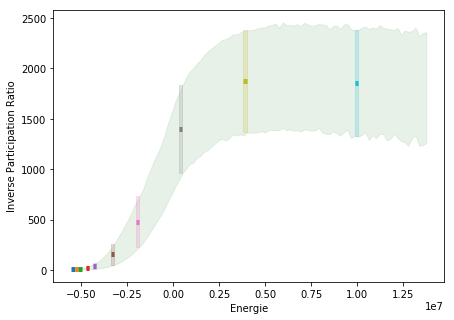

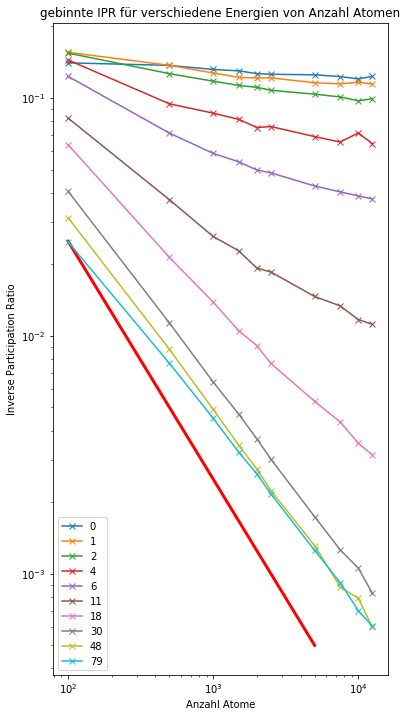

In [10]:
new_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
              '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
              '#bcbd22', '#17becf']


fig, axes = plt.subplots(1,1, figsize=(7,5))
#axes.plot(states,fit(states,*popt));
axes.fill_between(bin_edges[1:], bin_means-bin_std, bin_means+bin_std, color="darkseagreen", alpha=0.2)
j=0


#displaying=np.linspace(0,steps*0.5,10).astype(int)
displaying=np.logspace(0,1.9,10).astype(int)
displaying[0]=0

for i in displaying:
    binnss= np.linspace(bins[i],bins[i+1],2)
    axes.hlines(bin_means[i],binnss[0],binnss[1], lw=5, color=new_colors[j])
    axes.fill_between(binnss, bin_means[i]-bin_std[i], bin_means[i]+bin_std[i],color=new_colors[j], alpha=0.2)
    j+=1
    
axes.set_xlabel("Energie")
axes.set_ylabel("Inverse Participation Ratio");

#plt.savefig('IPR_spectrum.png',bbox_inches='tight')

    
fig, axes = plt.subplots(1,1, figsize=(6,12))
#axes.plot(states,fit(states,*popt));

axes.set_xscale("log")
axes.set_yscale("log")
axes.set_title("gebinnte IPR für verschiedene Energien von Anzahl Atomen")
x=np.arange(100,5000).astype(float)

axes.plot(x,poly_func([2.5,1],x), color="red", linewidth="3")
#axes[0].set_ylim(0,1)


for i in displaying:
    axes.errorbar(anzahl,ipr_gebint[:,i], marker="x",label="%i"%i)
    
axes.set_xlabel("Anzahl Atome")
axes.set_ylabel("Inverse Participation Ratio");
    
axes.legend();

#plt.savefig('IPR_numberatoms.png',bbox_inches='tight')

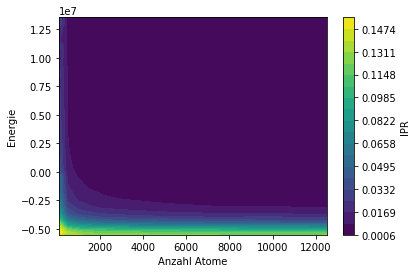

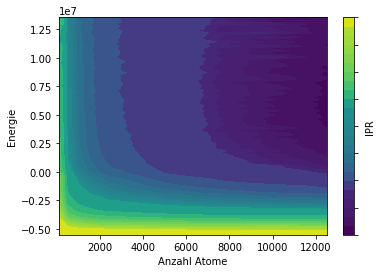

In [11]:
from matplotlib import ticker, cm
                 
plt.contourf(anzahl, bin_edges[:-1],(ipr_gebint.T), levels=np.linspace(min(min(x) for x in ipr_gebint), max(max(x) for x in ipr_gebint),20))

plt.colorbar(label="IPR")
plt.xlabel("Anzahl Atome")
plt.ylabel("Energie");
plt.show()



plt.contourf(anzahl, bin_edges[:-1],(ipr_gebint.T),locator=ticker.LogLocator(base=10.0, subs=np.arange(1,10)))
plt.colorbar(label="IPR")
plt.xlabel("Anzahl Atome");
plt.ylabel("Energie");

In [12]:
frac_dimensions_odr=[]
frac_dimensions_scipy=[]

anzahl = anzahl.astype(float)

indices= np.arange(0,steps-1,1)


for plot in indices:
    poly = Model(poly_func)
    mydata = RealData(anzahl,ipr_gebint[:,plot],sy=ipr_std[:,plot])
    myodr= ODR(mydata,poly,beta0=[1,1])
    myoutput = myodr.run()
    #myoutput.pprint()
    beta=myoutput.beta
    sd_beta=myoutput.sd_beta
    
    #popt,pcov = curve_fit(poly_func_scipy,anzahl,ipr_gebint[:,plot], p0=[1,-1])

    binnss= np.linspace(bins[plot],bins[plot+1],2)
    frac_odr= [binnss[0], binnss[1],beta[1],sd_beta[1]]
    #frac_scipy= [binnss[0], binnss[1],popt[1], np.sqrt(pcov[1][1])]


    frac_dimensions_odr.append(frac_odr)
    #frac_dimensions_scipy.append(frac_scipy)
    
frac_dimensions_odr = np.array(frac_dimensions_odr)
#frac_dimensions_scipy = np.array(frac_dimensions_scipy)

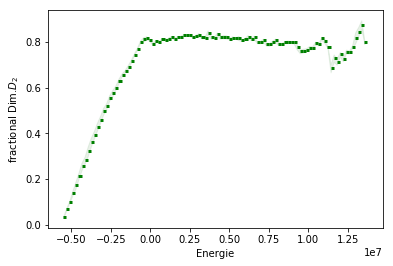

In [13]:
plt.fill_between(frac_dimensions_odr[:,0], (frac_dimensions_odr[:,2])-frac_dimensions_odr[:,3], (frac_dimensions_odr[:,2])+frac_dimensions_odr[:,3], color="darkseagreen", alpha=0.2)
plt.hlines(frac_dimensions_odr[:,2], frac_dimensions_odr[:,0], frac_dimensions_odr[:,1], colors='g', lw=3);
plt.ylabel("fractional Dim."+ "$ D_2$")
plt.xlabel("Energie");

#plt.hlines(-frac_dimensions_scipy[:,2], frac_dimensions_scipy[:,0], frac_dimensions_scipy[:,1], colors='r', lw=3)

# Mit verschiedenen q's für legendre 

In [22]:
global number_atoms
global radius

number_atoms=100
density= 0.1
r_b = 5
radius = (np.sqrt(number_atoms*r_b**2/density))

global angeregt
angeregt=0                  #atom 0 is atom in the center

anzahl = np.array([100,500,1000,1500,2000,2500,5000,7500,10000,12500,15000])
radiusse = (np.sqrt(anzahl*r_b**2/density))
q_array = np.arange(2,30,1)

In [23]:
eigenvalues=[[] for i in range(len(anzahl))]
ipr=[[] for i in range(len(anzahl))]
ipr_q=[[] for i in range(len(anzahl))]

i=0

density=0.1
for number_atoms, radius in zip(anzahl,radiusse):  
    #density=number_atoms*r_b**2/radius**2
    data = open("/home/jp/Dokumente/Bachelorarbeit/Mein_paper/BwHpcCluster/Results/Fractality/different_q/density_"+str(np.round(density,3))+"/atoms_"+str(number_atoms)+".npy","rb")
    
    ipr[i]=np.load(data)
    eigenvalues[i]=np.load(data)
    ipr_q[i]=np.load(data)    #3d list: 1. number_atoms, 2: q , 3: values
    i+=1
    
ipr=np.array(ipr)
eigenvalues=np.array(eigenvalues)

#### binning von ipr_2

In [12]:
ipr_gebint =[[] for i in anzahl]
ipr_std    =[[] for i in anzahl]

eig_min= max(min(x) for x in eigenvalues)
eig_max= min(max(x) for x in eigenvalues)

steps=100
bins=np.linspace(eig_min,eig_max,steps)

for i in range(len(anzahl)):
    bin_means, bin_edges, binnumber = stats.binned_statistic(eigenvalues[i],ipr[i], statistic='mean', bins=bins)
    bin_std, bin_edges, binnumber  = stats.binned_statistic(eigenvalues[i],ipr[i], statistic='std', bins=bins)
    
    ipr_gebint[i] = bin_means
    ipr_std[i]    = bin_std 
    
ipr_gebint=np.array(ipr_gebint)
ipr_std=np.array(ipr_std)

#### binning von ipr_q

In [13]:
ipr_q_gebint =[[[]for i in anzahl] for i in q_array]
ipr_q_std    =[[[]for i in anzahl] for i in q_array]

steps=100
bins=np.linspace(eig_min,eig_max,steps)

for j in range(len(q_array)):
    for i in range(len(anzahl)):
        bin_means, bin_edges, binnumber = stats.binned_statistic(eigenvalues[i],ipr_q[i][j], statistic='mean', bins=bins)
        bin_std, bin_edges, binnumber  = stats.binned_statistic(eigenvalues[i],ipr_q[i][j], statistic='std', bins=bins)
    
        ipr_q_gebint[j][i] = bin_means
        ipr_q_std[j][i]    = bin_std 
    
ipr_q_gebint=np.array(ipr_q_gebint)
ipr_q_std=np.array(ipr_q_std)

#ipr_q_gebint  1.q  2.atoms  3.values

In [14]:
print(ipr_gebint[1][0])
print(ipr_q_gebint[0][1][0])

0.3374907838313992
0.3374907838313992


### Auswertung

#### Verlauf des IPR für verschiedene q aus q_array (für alle Energien)

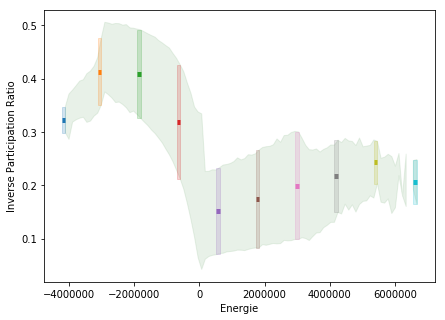

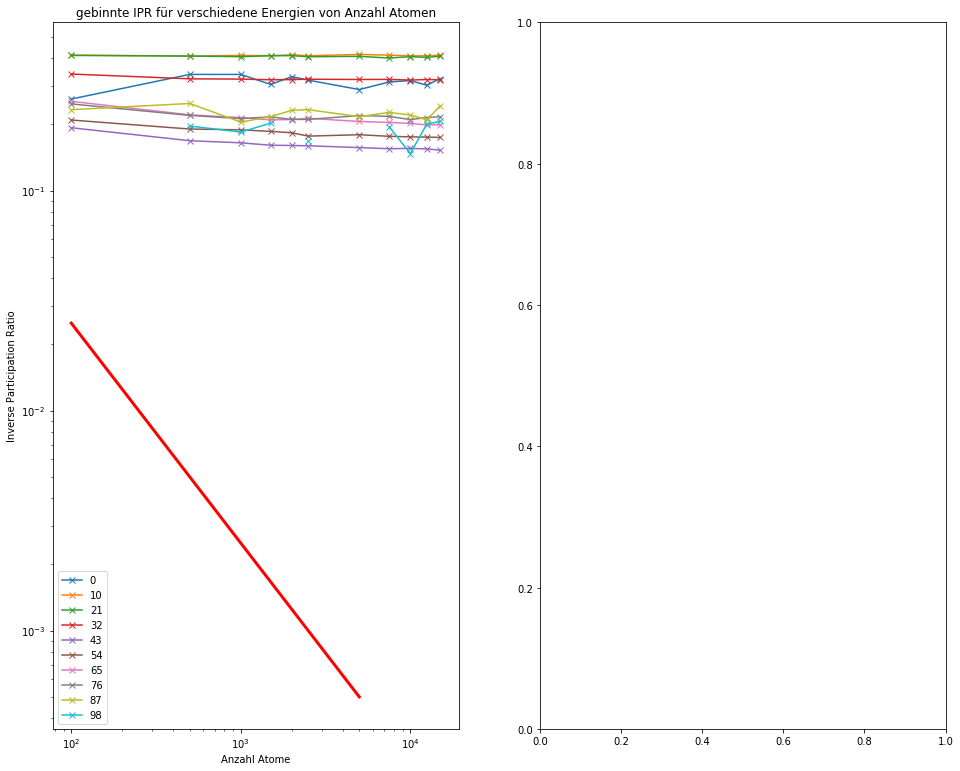

In [15]:
special_q=0

new_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
              '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
              '#bcbd22', '#17becf']


fig, axes = plt.subplots(1,1, figsize=(7,5))
#axes.plot(states,fit(states,*popt));

axes.fill_between(bin_edges[1:], ipr_q_gebint[special_q][-1]-ipr_q_std[special_q][-1], ipr_q_gebint[special_q][-1]+ipr_q_std[special_q][-1], color="darkseagreen", alpha=0.2)
j=0
for i in np.linspace(0,steps-2,10).astype(int):
    binnss= np.linspace(bins[i],bins[i+1],2)
    axes.hlines(ipr_q_gebint[special_q][-1][i],binnss[0],binnss[1], lw=5, color=new_colors[j])
    axes.fill_between(binnss, ipr_q_gebint[special_q][-1][i]-ipr_q_std[special_q][-1][i], ipr_q_gebint[special_q][-1][i]+ipr_q_std[special_q][-1][i],color=new_colors[j], alpha=0.2)
    j+=1
    
    
axes.set_xlabel("Energie")
axes.set_ylabel("Inverse Participation Ratio");
    
fig, axes = plt.subplots(1,2, figsize=(16,13))
#axes.plot(states,fit(states,*popt));

axes[0].set_xscale("log")
axes[0].set_yscale("log")
axes[0].set_title("gebinnte IPR für verschiedene Energien von Anzahl Atomen")
x=np.arange(100,5000).astype(float)

axes[0].plot(x,poly_func([2.5,1],x), color="red", linewidth="3")
#axes[0].set_ylim(0,1)


for i in np.linspace(0,steps-2,10).astype(int):
    axes[0].errorbar(anzahl,ipr_q_gebint[special_q][:,i], marker="x",label="%i"%i)
    
axes[0].set_xlabel("Anzahl Atome")
axes[0].set_ylabel("Inverse Participation Ratio");
    
axes[0].legend();

#### Fit tau(q) for all Energys for one q

/home/jp/.local/lib/python3.5/site-packages/scipy/odr/odrpack.py:395: RuntimeWarning: divide by zero encountered in true_divide
  return 1./numpy.power(sd, 2)


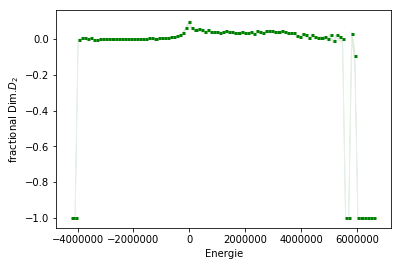

In [16]:
special_q=0

frac_dimensions_odr=[]
frac_dimensions_scipy=[]

anzahl = anzahl.astype(float)
indices= np.arange(0,steps-1,1)

for plot in indices:
    poly = Model(poly_func)
    mydata = RealData(anzahl,ipr_q_gebint[special_q][:,plot],sy=ipr_q_std[special_q][:,plot])
    myodr= ODR(mydata,poly,beta0=[1,-1])
    myoutput = myodr.run()
    #myoutput.pprint()
    beta=myoutput.beta
    sd_beta=myoutput.sd_beta
    
    #popt,pcov = curve_fit(poly_func_scipy,anzahl,ipr_gebint[:,plot], p0=[1,-1])

    binnss= np.linspace(bins[plot],bins[plot+1],2)
    frac_odr= [binnss[0], binnss[1],beta[1],sd_beta[1]]
    #frac_scipy= [binnss[0], binnss[1],popt[1], np.sqrt(pcov[1][1])]


    frac_dimensions_odr.append(frac_odr)
    #frac_dimensions_scipy.append(frac_scipy)
    
frac_dimensions_odr = np.array(frac_dimensions_odr)
#frac_dimensions_scipy = np.array(frac_dimensions_scipy)

plt.fill_between(frac_dimensions_odr[:,0], (frac_dimensions_odr[:,2])-frac_dimensions_odr[:,3], (frac_dimensions_odr[:,2])+frac_dimensions_odr[:,3], color="darkseagreen", alpha=0.2)
plt.hlines(frac_dimensions_odr[:,2], frac_dimensions_odr[:,0], frac_dimensions_odr[:,1], colors='g', lw=3);
plt.ylabel("fractional Dim."+ "$ D_2$")
plt.xlabel("Energie");

#plt.hlines(-frac_dimensions_scipy[:,2], frac_dimensions_scipy[:,0], frac_dimensions_scipy[:,1], colors='r', lw=3)

#### Berechnung tau(q) für eine bestimmte Energie

In [17]:
#find eigenenergy close to zero
special_energy=np.argmin(np.abs(bins))
print(special_energy)

38


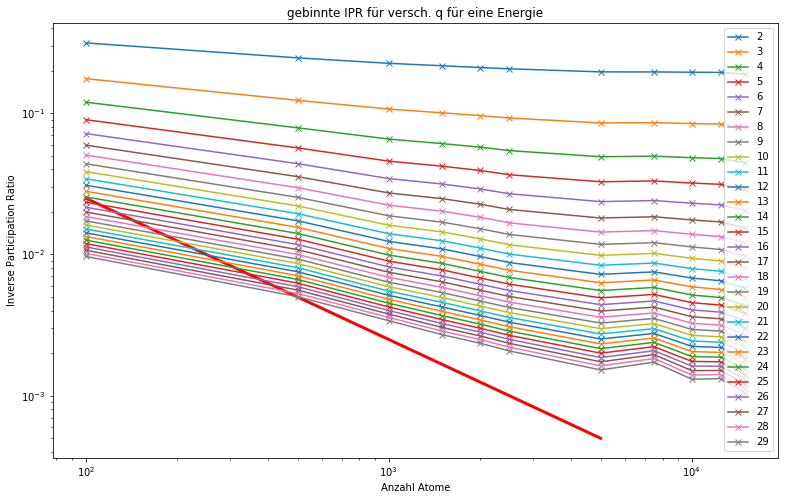

In [18]:
fig, axes = plt.subplots(1,1, figsize=(13,8))

axes.set_xscale("log")
axes.set_yscale("log")
axes.set_title("gebinnte IPR für versch. q für eine Energie")
x=np.arange(100,5000).astype(float)

axes.plot(x,poly_func([2.5,1],x), color="red", linewidth="3")
#axes[0].set_ylim(0,1)

for i,q in enumerate(q_array): 
    axes.errorbar(anzahl,ipr_q_gebint[i][:,special_energy], marker="x",label="%i"%q)
    
axes.set_xlabel("Anzahl Atome")
axes.set_ylabel("Inverse Participation Ratio");
    
axes.legend();

#### Fit für Steigung tau(q)

In [75]:

#special_energy=10

frac_dim_odr_err=[]
frac_dim_scipy=[]
frac_dim_odr=[]

anzahl = anzahl.astype(float)

poly = Model(poly_func)
mydata = RealData(anzahl,ipr_q_gebint[0][:,special_energy],sy=ipr_q_std[i][:,special_energy])
myodr= ODR(mydata,poly,beta0=[2,1])
myoutput = myodr.run()
#myoutput.pprint()
beta_err=myoutput.beta
sd_beta_err=myoutput.sd_beta

#popt,pcov = curve_fit(poly_func_scipy,anzahl,ipr_q_gebint[0][:,special_energy], p0=[2,1],maxfev=100000)

poly = Model(poly_func)
mydata = RealData(anzahl,ipr_q_gebint[0][:,special_energy])#,sy=ipr_q_std[i][:,special_energy])
myodr= ODR(mydata,poly,beta0=[2,1])
myoutput = myodr.run()
#myoutput.pprint()
beta=myoutput.beta
sd_beta=myoutput.sd_beta

for i,q in enumerate(q_array):     
    
#berechne die zu vorschlagenden Variablen
    #odr mit binning fehler
    poly = Model(poly_func)
    mydata = RealData(anzahl,ipr_q_gebint[i][:,special_energy],sy=ipr_q_std[i][:,special_energy])
    myodr= ODR(mydata,poly,beta0=beta_err)
    myoutput = myodr.run()
    beta_err=myoutput.beta
    sd_beta_err=myoutput.sd_beta
    
    
    #scipy   
    #popt,pcov = curve_fit(poly_func_scipy,anzahl,ipr_q_gebint[i][:,special_energy], p0=popt,maxfev=100000)
    
    #odr ohne binning fehler
    poly = Model(poly_func)
    mydata = RealData(anzahl,ipr_q_gebint[i][:,special_energy])
    myodr= ODR(mydata,poly,beta0=beta)
    myoutput = myodr.run()
    beta=myoutput.beta
    sd_beta=myoutput.sd_beta
    
    
    #berechne eigentliche Werte
    poly = Model(poly_func)
    mydata = RealData(anzahl,ipr_q_gebint[i][:,special_energy],sy=ipr_q_std[i][:,special_energy])
    myodr= ODR(mydata,poly,beta0=beta_err)
    myoutput = myodr.run()
    beta_err=myoutput.beta
    sd_beta_err=myoutput.sd_beta
    
    #popt,pcov = curve_fit(poly_func_scipy,anzahl,ipr_q_gebint[i][:,special_energy], p0=popt,maxfev=100000)
   
    poly = Model(poly_func)
    mydata = RealData(anzahl,ipr_q_gebint[i][:,special_energy])
    myodr= ODR(mydata,poly,beta0=beta)
    myoutput = myodr.run()
    beta=myoutput.beta
    sd_beta=myoutput.sd_beta

    frac_odr_err= [beta_err[0],beta_err[1],sd_beta_err[1]]
    #frac_scipy= [popt[0],popt[1], np.sqrt(pcov[1][1])]
    frac_odr= [beta[0],beta[1],sd_beta[1]]


    frac_dim_odr_err.append(frac_odr_err)
    #frac_dim_scipy.append(frac_scipy)
    frac_dim_odr.append(frac_odr)
    
frac_dim_odr_err = np.array(frac_dim_odr_err)
#frac_dim_scipy = np.array(frac_dim_scipy)
frac_dim_odr = np.array(frac_dim_odr)

Text(0, 0.5, 'tau(q)')

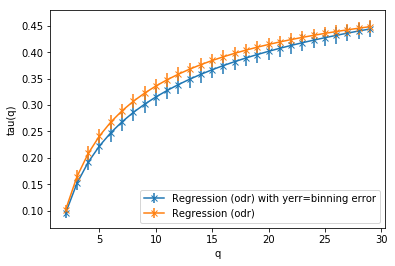

In [76]:
plt.errorbar(q_array,frac_dim_odr_err[:,1],frac_dim_odr_err[:,2], marker="x", label="Regression (odr) with yerr=binning error")
plt.errorbar(q_array,frac_dim_odr[:,1],frac_dim_odr[:,2], marker="x", label="Regression (odr)")
#plt.errorbar(q_array,frac_dim_scipy[:,1],frac_dim_scipy[:,2], marker="x", label="curve fit (scipy)")
plt.legend();
plt.xlabel("q")
plt.ylabel("tau(q)")

#### Überprüfen des Fits

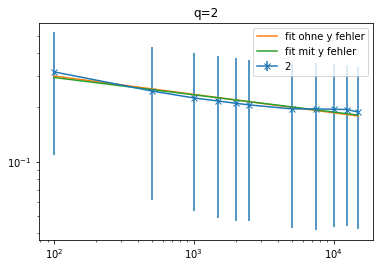

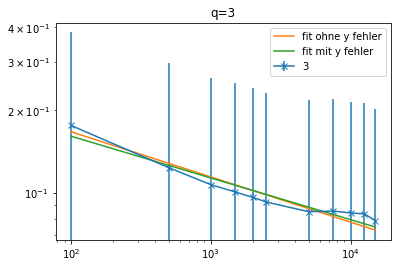

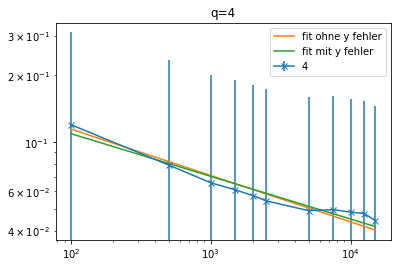

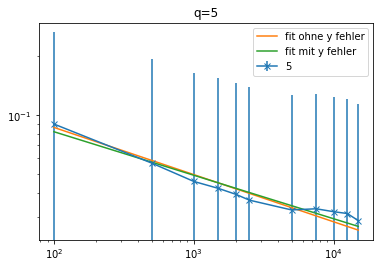

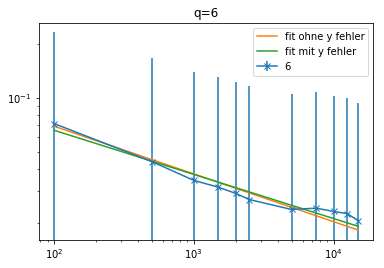

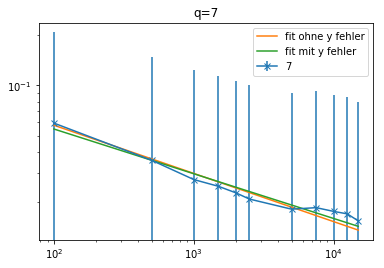

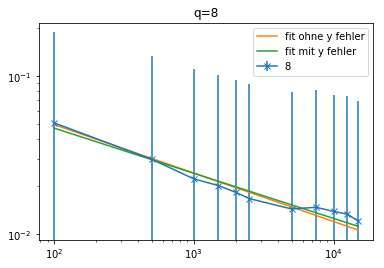

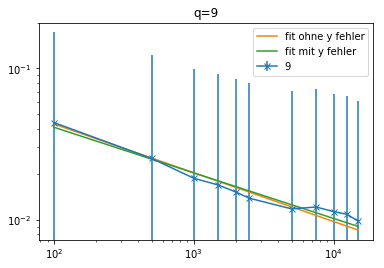

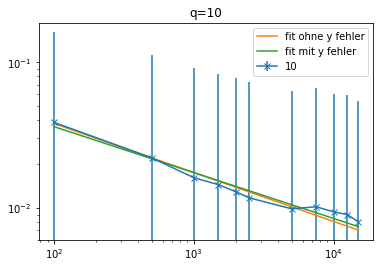

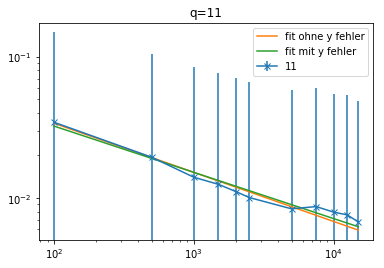

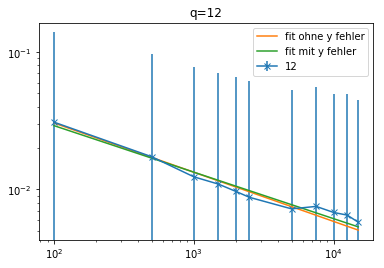

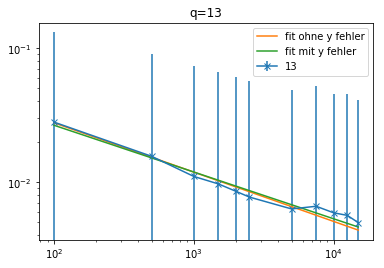

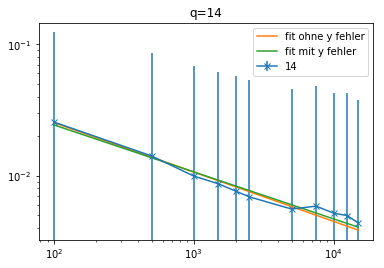

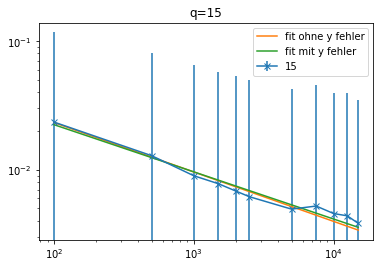

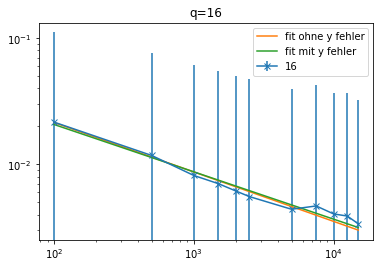

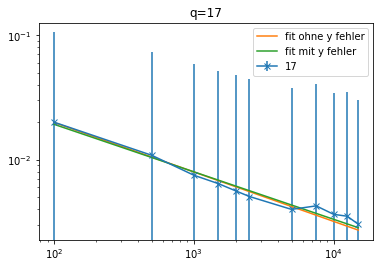

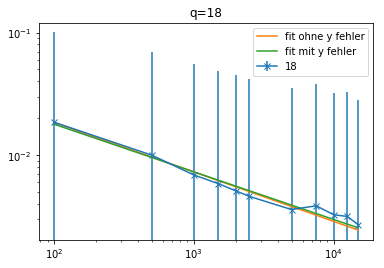

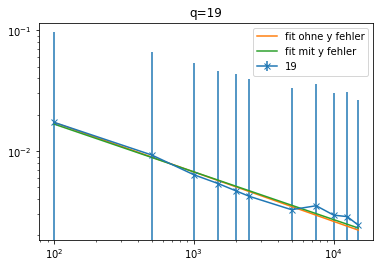

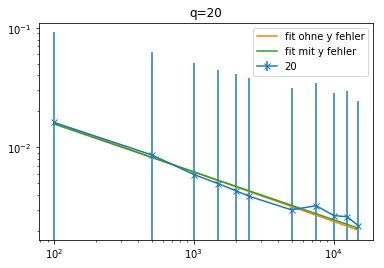

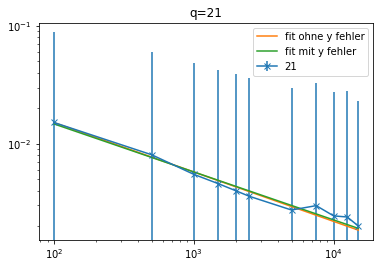

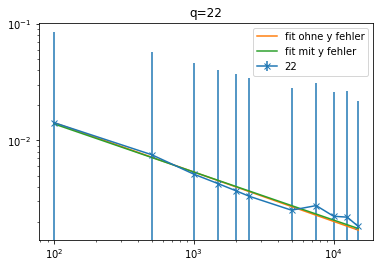

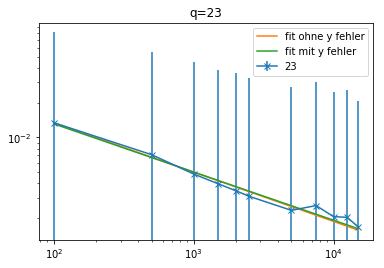

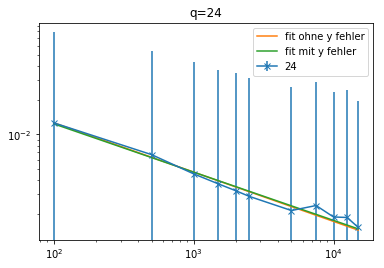

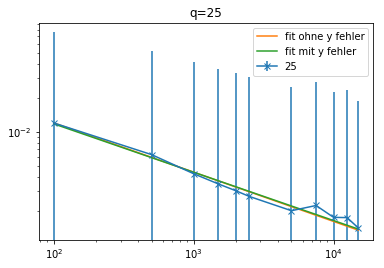

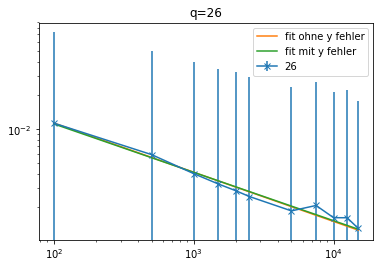

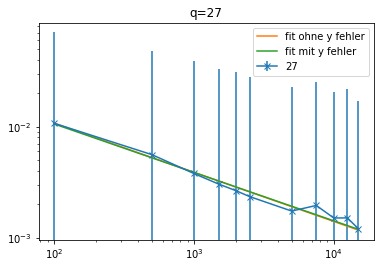

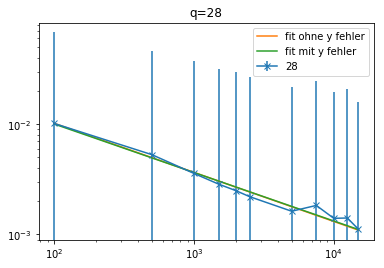

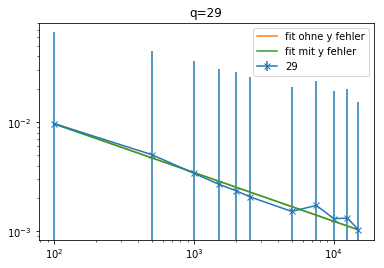

In [74]:
for i,q in enumerate(q_array): 
    if q>0:
        plt.errorbar(anzahl,ipr_q_gebint[i][:,special_energy],ipr_q_std[i][:,special_energy], marker="x",label="%i"%q)
        plt.plot(anzahl,poly_func([frac_dim_odr[i][0],frac_dim_odr[i][1]],anzahl), label="fit ohne y fehler")
        plt.plot(anzahl,poly_func([frac_dim_odr_err[i][0],frac_dim_odr_err[i][1]],anzahl), label="fit mit y fehler")
        plt.legend()
        
        plt.title("q="+str(q))
        plt.xscale("log")
        plt.yscale("log")
        plt.show()


#### Um die Steigung einzeln zu bestimmen:

In [269]:
dimensions=[]

0.26503897269256316
6.704675968051963


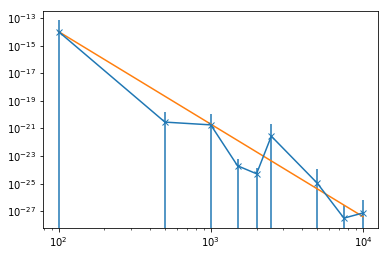

In [451]:
plot=12
poly = Model(poly_func)
mydata = RealData(anzahl,ipr_q_gebint[plot][:,special_energy])#,sy=ipr_q_std[i][:,special_energy])
myodr= ODR(mydata,poly,beta0=[60000,6])
myoutput = myodr.run()
#myoutput.pprint()
beta=myoutput.beta
sd_beta=myoutput.sd_beta

plt.errorbar(anzahl,ipr_q_gebint[plot][:,special_energy],ipr_q_std[plot][:,special_energy], marker="x")
plt.plot(anzahl,poly_func([beta[0],beta[1]],anzahl))
plt.xscale("log")
plt.yscale("log")

print(beta[0])
print(beta[1])



In [354]:
dimensions.append([beta[0],beta[1],sd_beta[1]])

### Legendre Trafo

In [46]:
tau_q=frac_dim_odr[:,1]

In [47]:
alpha_array= np.arange(0,4,0.5)
f=np.zeros(len(alpha_array))
for i,alpha in enumerate(alpha_array):
    f[i]=np.max(alpha*q_array-tau_q)

<ErrorbarContainer object of 3 artists>

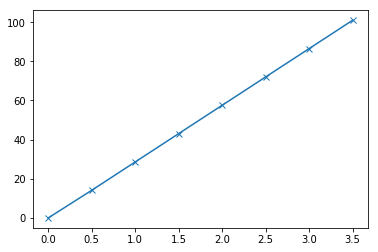

In [48]:
plt.errorbar(alpha_array,f,marker="x")

0.2108093105151411
0.8623246471394019


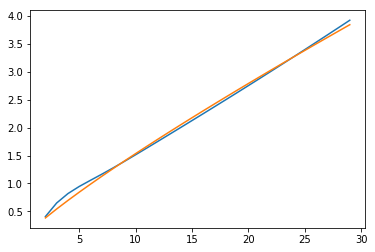

In [51]:
plt.errorbar(q_array,frac_dim_odr_err[:,1])

poly = Model(poly_func)
mydata = RealData(q_array,frac_dim_odr_err[:,1])#,sy=ipr_q_std[i][:,special_energy])
myodr= ODR(mydata,poly,beta0=[5,-1])
myoutput = myodr.run()
#myoutput.pprint()
beta=myoutput.beta
sd_beta=myoutput.sd_beta

plt.errorbar(q_array,poly_func(beta, q_array))

print(beta[0])
print(-beta[1])